<h1 align='center'>Titanic Survival Prediction using Logistic Regression</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../Datasets/titanic_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df=df.drop(columns='Cabin',axis=1)
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked=df.Embarked.fillna(method='ffill')

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

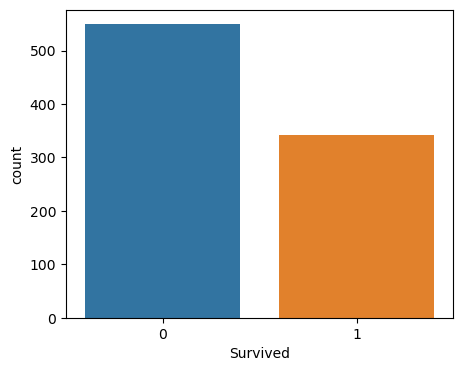

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived',data=df)
plt.show()

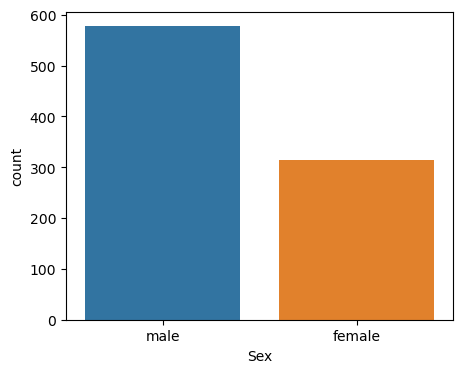

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='Sex',data=df)
plt.show()

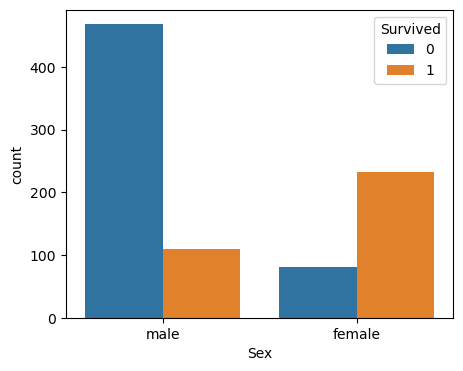

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

In [10]:
df=df.replace({'Sex':{'male':0,'female':1},'Embarked':{'C':0,'Q':1,'S':2}})

In [11]:
X=df.drop(columns=['Name','Ticket','Survived'],axis=1)
Y=df.Survived

In [12]:
X.shape,Y.shape

((891, 8), (891,))

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [14]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [15]:
predicted_y_train=model.predict(X_train)
accuracy_score(predicted_y_train,Y_train)

0.800561797752809

In [16]:
predicted_y_test=model.predict(X_test)
accuracy_score(predicted_y_test,Y_test)

0.776536312849162